# DAT-ATX-1 Capstone Project

#### Nikolaos Vergos, February 2016
<nvergos@gmail.com>

## 2a. Supervised Learning: Regression Analysis

### 0. Import libraries & packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Import dataset

In [3]:
#Reading the dataset in a dataframe using Pandas
df = pd.read_csv('../data/master.csv')  

#Print first observations
df.head() 

,Facility_ID,Restaurant_Name,Inspection_Date,Process_Description,Geocode,Street,City,Zip_Code,Score,Med_Income,Population,Home_Ownership,Latitude,Longitude
0,2801996,Mr. Gatti's #118,2015-12-23,Routine Inspection,"2121 W PARMER LN, AUSTIN, TX 78758",2121 W PARMER LN,AUSTIN,78758,94,42398,42977,0.309,30.415649,-97.697569
1,10385802,Subway,2015-12-23,Routine Inspection,"2501 W PARMER LN, AUSTIN, TX 78758",2501 W PARMER LN,AUSTIN,78758,98,42398,42977,0.309,30.418236,-97.702242
2,2802274,Baskin Robbins,2015-12-23,Routine Inspection,"12407 N MOPAC EXPY, AUSTIN, TX 78758",12407 N MOPAC EXPY,AUSTIN,78758,99,42398,42977,0.309,30.417462,-97.702844
3,10964220,JR's Tacos,2015-12-22,Routine Inspection,"1921 CEDAR BEND DR, AUSTIN, TX 78758",1921 CEDAR BEND DR,AUSTIN,78758,91,42398,42977,0.309,30.408322,-97.698243
4,10778546,Econo Lodge,2015-12-22,Routine Inspection,"9100 BURNET RD, AUSTIN, TX 78758",9100 BURNET RD,AUSTIN,78758,91,42398,42977,0.309,30.374790,-97.726417


Throughout the Machine Learning part of this project we will be using **scikit-learn**, an open source machine learning library for the Python programming language.

### Linear Regression

#### a. Multiple Linear Regression in ALL data - bad idea

We are starting with an absurd idea: let us try to create a simple linear regression model to predict a restaurant's score given our numerics as features: the median income, population and home ownership percentage:

In [4]:
# There are some NaN values in our numerics (UT Campus and ABIA)
# Let us remove rows from those zip codes from the DataFrame:

df = df[np.isfinite(df['Population'])]

# create X and y
feature_cols = ['Med_Income', 'Population', 'Home_Ownership']
X = df[feature_cols]
y = df.Score

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

89.1811143368
[  4.58900571e-05  -1.64372962e-05  -8.17131991e-01]


In [5]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

[('Med_Income', 4.5890057114049346e-05),
 ('Population', -1.6437296248362439e-05),
 ('Home_Ownership', -0.81713199137826042)]

In [6]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X,y))

Variance score: 0.01


We are explaining 1% of the variance with our model. Definitely nothing to write home about... This was to be expected anyway, since the numerical data we have added pertain to a whole zip code, not each individual restaurant.

In [8]:
# Let us check how many rows we are left with after excluding the UT Campus and ABIA areas:

len(df)

15957

#### b. Linear Regression on averaged data

As we have mentioned, the reason why the above model was so terrible is quite straightforward: even though the numerical data we have in our DataFrame (Median Income, Population, Home Ownership Percentage) pertain to a whole Zip Code, we attached them to each individual row - every restaurant was supposed to carry those features. This, of course, is absurd and wrong. However we can still try a weak prediction if instead of using all 15,957 rows we dramatically shrink our dataset to... 34 rows - i.e. one for each Zip Code. So, we will have an average restaurant score which we will be trying to predict, or, how do restaurants in a certain area do on average, given the demographics of its inhabitants.

In [9]:
average_scores = df.groupby('Zip_Code').mean()
len(average_scores)

34

In [10]:
average_scores.head()

,Facility_ID,Score,Med_Income,Population,Home_Ownership,Latitude,Longitude
Zip_Code,,,,,,,
78701,7394822.662348,87.714939,35757,3780,0.377,30.268113,-97.742015
78702,7173129.697500,89.976250,23348,22498,0.467,30.263794,-97.718697
78703,6246431.545220,90.149871,54591,19522,0.515,30.280433,-97.761260
78704,7250249.096037,89.975610,35733,43343,0.302,30.244061,-97.764413
78705,6567070.349493,92.064262,14740,26972,0.110,30.291497,-97.741109


It is of paramount importance to remember that we are **NOT** supposed to be extracting any useful information from this regression model we are about to apply. After all, we only have a tiny number of rows, each one corresponding to an entire Zip Code. However we might still be able to create a model that will yield some strong trends which would help us make, if not a prediction, an **educated guess** about the average score of all restaurants in a Zip Code with given demographic data.

Let's take it one by one:

##### Predict Score using zip code's Median Income

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = average_scores['Med_Income'].values
y = average_scores['Score'].values

In [18]:
# Check the shapes of the X and y vectors:

print X.shape
print y.shape

(34,)
(34,)


In [19]:
# Reshape to get them to work when we fit the model:

X = X.reshape(34,1);
y = y.reshape(34,1);

In [20]:
# Fit linear regression model:
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

[ 88.71868357]
[[  4.12805195e-05]]


In [21]:
# And score it:

lm.score(X,y)

0.35211721509154936

This is a not a very exciting score for our model; We are explaining 35.2% of the variance, but we have to keep into account that:
- We have 35 pairs of data points: (Median Income, Score)
- We have trained our model on our entire dataset so we have really overfit the data

The Linear Regression Part of this Notebook is purely a toy problem, not expected to yield any respectable results. Therefore I will not bother with train/test split and cross validation techniques yet - even if those do raise my model's score, they won't compensate for the lack of data.

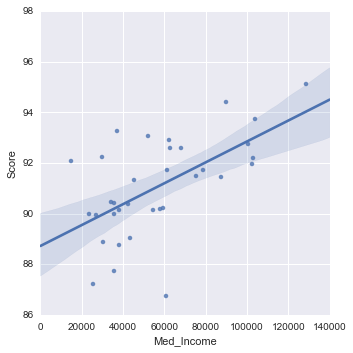

In [22]:
# Visualization using Seaborn:

sns.lmplot(x="Med_Income", y="Score", data=average_scores);

In [23]:
print "The Pearson Correlation coefficient between Median Income and Average Score is {0}".\
format(np.corrcoef(average_scores['Med_Income'].values, average_scores['Score'].values)[1][0])

The Pearson Correlation coefficient between Median Income and Average Score is 0.593394653744


We can see from the scatterplot and the Pearson Correlation Coefficient that there is indeed a weak positive correlation between the two quantities. Recall that **for Simple Linear Regression models like ours, the square of the Pearson Correlation Coefficient is equal to the R-squared parameter** we have calculated above, i.e. the fraction of the variance in our data explained by our model.

##### Predict Score using zip code's Population

The process is exactly the same as above:

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = average_scores['Population'].values
y = average_scores['Score'].values

In [25]:
# Check the shapes of the X and y vectors:

print X.shape
print y.shape

(34,)
(34,)


In [26]:
# Reshape to get them to work when we fit the model:

X = X.reshape(34,1);
y = y.reshape(34,1);

In [27]:
# Fit linear regression model:
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

[ 92.10987875]
[[ -4.91500312e-05]]


In [28]:
# And score it:

lm.score(X,y)

0.12270867617781611

I was expecting a much lower score for this model compared to the previous one. Population isn't really a good indicator of restaurants' health inspection scores, since the more populous Zip Codes (for instance: 78704) correspond to really diverse neighborhoods with a large variety of establishments of all kinds. This will end up being an important result of this entire project: Austin's areas are really diverse.

Of course, the arguments from above against much faith in this model still stand: we have 35 pairs of data points and we are overfitting.

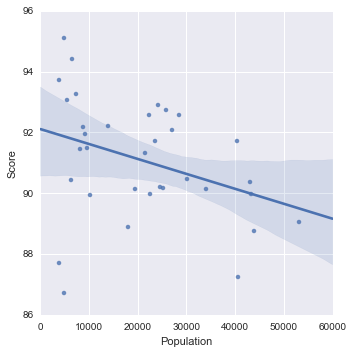

In [29]:
# Visualization using Seaborn:

sns.lmplot(x="Population", y="Score", data=average_scores);

In [30]:
print "The Pearson Correlation coefficient between Population and Average Score is {0}".\
format(np.corrcoef(average_scores['Population'].values, average_scores['Score'].values)[1][0])

The Pearson Correlation coefficient between Population and Average Score is -0.350297981978


It is quite interesting that the correlation between the two quantities is negative. Of course this could just mean that the really "small" Zip Codes correspond to rather affluent (and hence, sparsely populated) neighborhoods with very few restaurants that probably score really well in the inspection.

Another thing to take into account is that the slope of this "best fit" line is really minuscule. This means that if our model had any merit, in order for us to predict a failing score of 69, the population of an imaginary Zip Code would have to be almost... 450,000 people!

In [36]:
print "For a predicted score: {0} (just below the cutoff), the population would have to be {1}".\
format(lm.predict(450000)[0][0], 450000)

For a predicted score: 69.9923646907 (just below the cutoff), the population would have to be 450000


##### Predict Score using zip code's Home Ownership

As above:

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = average_scores['Home_Ownership'].values
y = average_scores['Score'].values

In [38]:
# Reshape the X and y vectors to get them to work when we fit the model:

X = X.reshape(34,1);
y = y.reshape(34,1);

In [39]:
# Fit linear regression model:
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

[ 89.89354972]
[[ 2.30023946]]


In [40]:
# And score it:

lm.score(X,y)

0.081301381948750584

This is quite an interesting and even unexpected result, since we had this predisposition to believe that since Median Income and Home Ownership Percentages are (or should be) strongly correlated, then the percentage of Home Ownership should be a respectable indicator (if not a predictor) for successful restaurants in the context of Health Inspections. It seems it doesn't play such a role though.

Austinites seem to prefer renting rather than buying, given the state of the Real Estate market, and some of the very affluent Zip Codes downtown have excellent restaurant scores but very few home owners. Of course the strong arguments against any predictive model still stand: very few data points and overfitting.

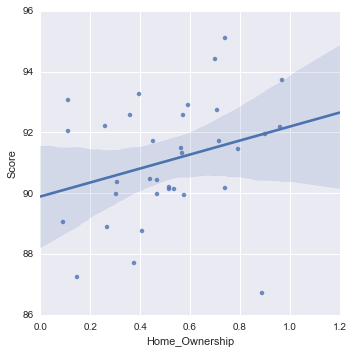

In [41]:
# Visualization using Seaborn:

sns.lmplot(x="Home_Ownership", y="Score", data=average_scores);

This "best fit" line illustrates how disastrous this model is. Since the percentage of home owners in a Zip Code is bounded between 0 and 100%, the model "predicts" that all restaurants, regardless of Home_Ownership fraction, would score between 90 and 92, without taking into account uncertainty for the slope...

And for completeness:

In [42]:
print "The Pearson Correlation coefficient between Home Ownership Percentage and Average Score is {0}".\
format(np.corrcoef(average_scores['Home_Ownership'].values, average_scores['Score'].values)[1][0])

The Pearson Correlation coefficient between Home Ownership Percentage and Average Score is 0.28513397193


The three attempts for individual linear regression predictive models have not really made us any wiser, even though they did at least show us some broad trends pertinent to our data set, which we could loosely extrapolate to other urban areas with the characteristics of Austin. (good luck with that!)

To complete our toy problem, let us attempt to fit a multiple linear regression model to our data; Let us try to predict the average score of health inspections on a Zip Code when all three features are given as inputs.


##### Multiple Linear Regression: Predict Score using zip code's numerics: Median Income, Population and Home Ownership

In [43]:
feature_cols = ['Med_Income', 'Population', 'Home_Ownership']

In [44]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = average_scores[feature_cols]
y = average_scores['Score'].values

In [45]:
# Check the shapes of the X and y vectors:

print X.shape
print y.shape

(34, 3)
(34,)


In [46]:
y = y.reshape(34,1);

In [47]:
# Fit linear regression model:
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

[ 90.47988829]
[[  6.05003631e-05  -3.66661204e-05  -4.05780405e+00]]


In [48]:
# And score it:

lm.score(X,y)

0.46417897248322382

Now this would have been a very interesting plot, had it been possible to graph in 4 dimensions! It seems that our combined model has managed to explain almost 50% of the variance in our data, and this successfully concludes this section. There is no way to get accurate predictions of a restaurant's score if we don't obtain other features that will help us make more educated assumptions.

As we have discussed, this looks primarily like a classification problem. We are going to use the multitude of information we have for each restaurant (like its location, the cuisine, even the address) trying to classify it in one of two or more categories. I will discuss this in more detail in the next section.

### Next: Supervised Learning - Classification